# The Sparks Foundation - Data Science & Business Analytics Internship 

## TASK 1 - Prediction using Supervised Machine Learning algorithm

### Author: Ritu Devnani

### #GRIPJANUARY22

# Step 1: Import the data set.

In [1]:
# Here we are importing all the required library and function 

# It offers data structures and operations for manipulating numerical tables and time series
import pandas as pd

# Python NumPy is an array processing package which provides tools for handling the n-dimensional arrays. 
import numpy as np  

# This library is used for building graphs from the data given
import matplotlib.pyplot as plt  
%matplotlib inline

# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns 

In [2]:
# Read the data from a csv
source = "scores.csv"

# df(dataframe) stores the data in tabular form
df = pd.read_csv(source)

In [3]:
# displaying the first 5 contents of the file

print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [4]:
# find number of rows and columns
df.shape

(25, 2)

In [5]:
# to get information about our data set we are going to use df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Step 2: Visualizing Data

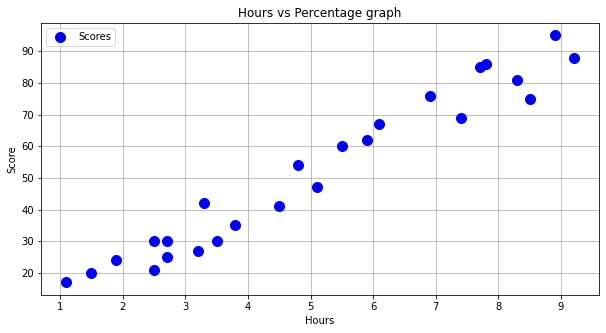

In [6]:
# Plotting the dataset
    
plt.rcParams["figure.figsize"] = [10,5] #defines the dimensions of the graph
df.plot(x='Hours', y='Scores', style='.', color='blue', markersize=20)
plt.title('Hours vs Percentage graph')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.grid()
plt.show()

# STEP 3: Data preparation 

In [7]:
# split into dependent and independent variable
# iloc function is used to retrive particular fields from dataframe

#to get 1st column
x = df.iloc[:, 0:1].values 

#to get 2nd column
y = df.iloc[:, 1:].values

In [8]:
print("Hours:\n", x)

Hours:
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [9]:
print("Scores:\n", y)

Scores:
 [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [10]:
#Split data into training and testing data

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#here 0.3 indicate 30 percent of data for testing and 70 percent for traning purpose 
#random_state controls the shuffling applied to the data before applying the split

# Step 4: Training the Model

In [11]:
from sklearn.linear_model import LinearRegression  

#LinearRegression fits a linear model
model = LinearRegression()  
model.fit(x_train, y_train)

#output: copy_Xbool: if True, X will be copied; else, it may be overwritten.
#n_jobsint, default=None; The number of jobs to use for the computation.
#fit_interceptbool: whether to calculate the intercept for this model.

LinearRegression()

# Step 5: Visualising the Model

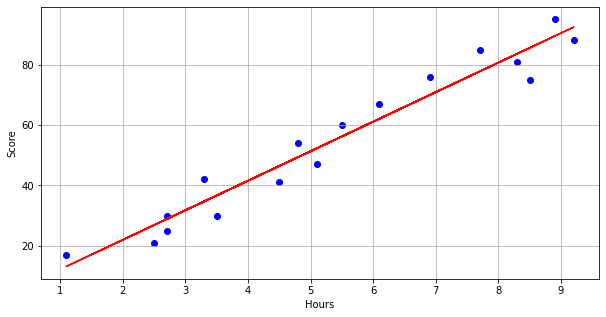

In [12]:
line = model.coef_*x + model.intercept_
#coef_: coefficient of the features in the decision function.

# Plotting for the training data

plt.rcParams["figure.figsize"] = [10,5] # 10*5 is the size of graph
plt.scatter(x_train, y_train, color='blue')
plt.plot(x, line, color='red')
plt.xlabel('Hours')  
plt.ylabel('Score') 
plt.grid()
plt.show()

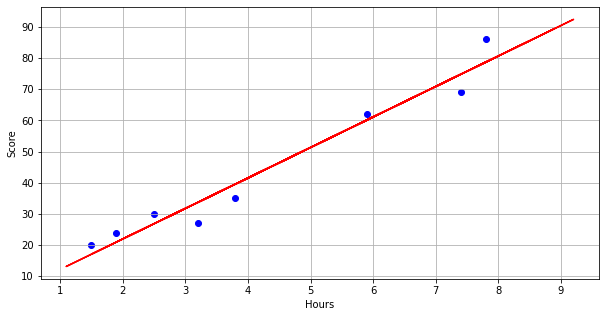

In [13]:
# Plotting for the testing data

plt.rcParams["figure.figsize"] = [10,5] 
plt.scatter(x_test, y_test, color='blue')
plt.plot(x, line, color='red');
plt.xlabel('Hours')  
plt.ylabel('Score') 
plt.grid()
plt.show()

# Step 6: Making Predictions

In [14]:
print("Hours:\n", x_test) # Testing data(in Hours)
y_pred = model.predict(x_test) # Predicting the scores using the test data
print("Predicted Scores:\n", y_pred)

Hours:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
Predicted Scores:
 [[17.05366541]
 [33.69422878]
 [74.80620886]
 [26.8422321 ]
 [60.12335883]
 [39.56736879]
 [20.96909209]
 [78.72163554]]


In [16]:
print("Actual:\n", y_test, "\nPredicted:\n", y_pred)

Actual:
 [[20]
 [27]
 [69]
 [30]
 [62]
 [35]
 [24]
 [86]] 
Predicted:
 [[17.05366541]
 [33.69422878]
 [74.80620886]
 [26.8422321 ]
 [60.12335883]
 [39.56736879]
 [20.96909209]
 [78.72163554]]


In [15]:
# Predicting the score of student if he/ she studies for 9.25 hours
hours = [[9.25]]
pred = model.predict(hours)
print("Predicted Score for studying 9.25 hrs/day is", (pred[0]))

Predicted Score for studying 9.25 hrs/day is [92.91505723]


# Step 7: Evaluation the Model

In [16]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652


###### This indicates that our model is 90 to 96 % accurate